In [13]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.backend import clear_session
import numpy as np
import pylab
import matplotlib.pyplot as plt 
from PIL import Image 
%matplotlib inline

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

## Поменяем формат и нормализуем

In [49]:
x_train.shape

(60000, 784)

In [14]:
def preprocess_mnits(data):
    data = data.reshape(data.shape[0], data.shape[1] ** 2)
    data = data.astype('float32')
    data = data / 255
    return data

In [15]:
def to_categorical_mnist(data):
    return utils.to_categorical(data, 10)

In [16]:
x_train = preprocess_mnits(x_train_org)
x_test = preprocess_mnits(x_test_org)

In [17]:
y_train = to_categorical_mnist(y_train_org)
y_test = to_categorical_mnist(y_test_org)

In [40]:
class MNIST_Model:
    def __init__(self, neorons=128, activation='relu', batch_size=32, epochs=15):
        clear_session()
        self.neorons = neorons
        self.activation = activation
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self.history = None

    def build_model(self):
        self.model = Sequential([Input(shape=(784, ))])
        self.model.add(Dense(self.neorons, activation=self.activation))
        self.model.add(Dense(self.neorons, activation=self.activation))
        self.model.add(Dense(10, activation='softmax'))
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return self.model

    def train(self, x_train, y_train, x_test, y_test):
        if self.model is None:
            self.build_model()
        self.history = self.model.fit(
            x_train, y_train,
            validation_data=(x_test, y_test),
            epochs=self.epochs,
            batch_size=self.batch_size,
            verbose=0            
        )
        return self.history
    def evaluate(self, x_test, y_test):
        loss, acc = self.model.evaluate(x_test, y_test)
        return acc

    def predict(self, img_array):
        if self.model is None:
            raise ValueError('Модель не обучена. Вызовите метод train()')
        preds = self.model.predict(img_array)
        return np.argmax(preds, axis=1)

### Модели с функцией активации relu

In [19]:
for i in [10, 100, 5000]:
    model = MNIST_Model(neorons=i)
    model.train(x_train, y_train, x_test, y_test)
    print(f'Точность с {i} нейронами: {model.evaluate(x_test, y_test)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.9356 - loss: 0.2243
Точность с 10 нейронами: 0.9355999827384949
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.9785 - loss: 0.1000
Точность с 100 нейронами: 0.9785000085830688
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9750 - loss: 0.1969
Точность с 5000 нейронами: 0.9750000238418579


## Поменям функию активации в скрытых слоях с relu на linear

In [20]:
model = MNIST_Model(neorons=100, activation='linear')
model.train(x_train, y_train, x_test, y_test)
print(f'Точность с функцией активации linear: {model.evaluate(x_test, y_test)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9215 - loss: 0.2873
Точность с функцией активации linear: 0.921500027179718


## Изменение размера batch_size

In [21]:
for i in [1, 10, 100, 6000]:
    model = MNIST_Model(neorons=10, batch_size=i)
    model.train(x_train, y_train, x_test, y_test)
    print(f'Точность с размером батча {i}: {model.evaluate(x_test, y_test)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9240 - loss: 0.2739
Точность с размером батча 1: 0.9240000247955322
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.9469 - loss: 0.1947
Точность с размером батча 10: 0.9469000101089478
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.9379 - loss: 0.2143
Точность с размером батча 100: 0.9379000067710876
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8383 - loss: 0.6510
Точность с размером батча 6000: 0.8382999897003174


In [62]:
def prepare_image(path, invert_colors=True, show=False):
    img = image.load_img(path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    
    if invert_colors:
        img_array = 255 - img_array
        
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 784)
    
    if show:
        plt.imshow(img, cmap='gray')
        plt.title('Входное изображение')
        plt.axis('off')
        plt.show()

    return img_array

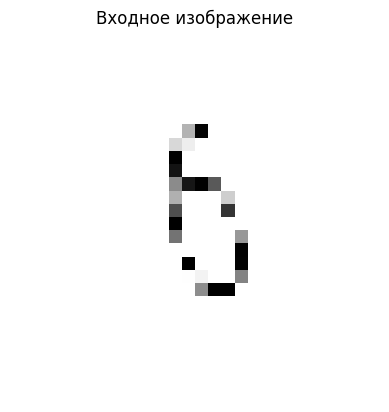

In [63]:
img_path = '6.png'
x_img = prepare_image(img_path,invert_colors=False ,show=True)

In [64]:
model = MNIST_Model(neorons=10)
model.train(x_train, y_train, x_test, y_test)

In [65]:
pred = model.predict(x_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [66]:
print(pred)

[3]


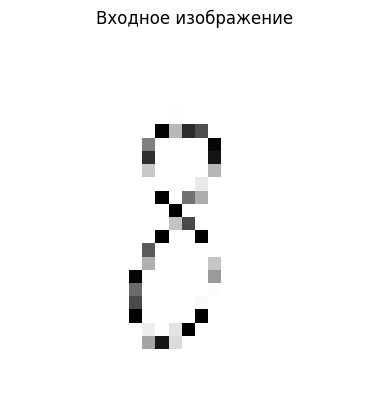

In [67]:
img_path_8 = '8.png'
x_img_8 = prepare_image(img_path_8, show=True)

In [70]:
print(model.predict(x_img_8))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[1]


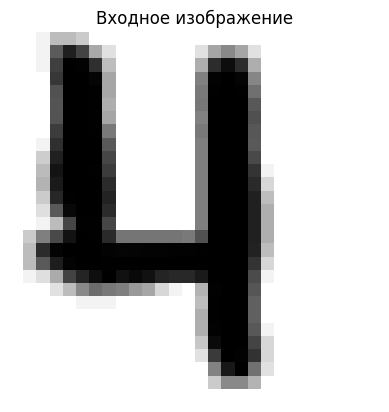

In [71]:
img_4 = prepare_image('4.png', show=True)

In [72]:
print(model.predict(img_4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[8]
